In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pwd

/Users/shrutigandhi/Documents/wids-datathon-2022/notebooks


In [3]:
train_df = pd.read_csv("/Users/shrutigandhi/Documents/wids-datathon-2022/data/train.csv")
test_df = pd.read_csv("/Users/shrutigandhi/Documents/wids-datathon-2022/data/test.csv")

In [4]:
!git branch -a

  main
* vritti_wids22
  remotes/origin/HEAD -> origin/main
  remotes/origin/main


### Exploring Data (EDA)

In [5]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [8]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

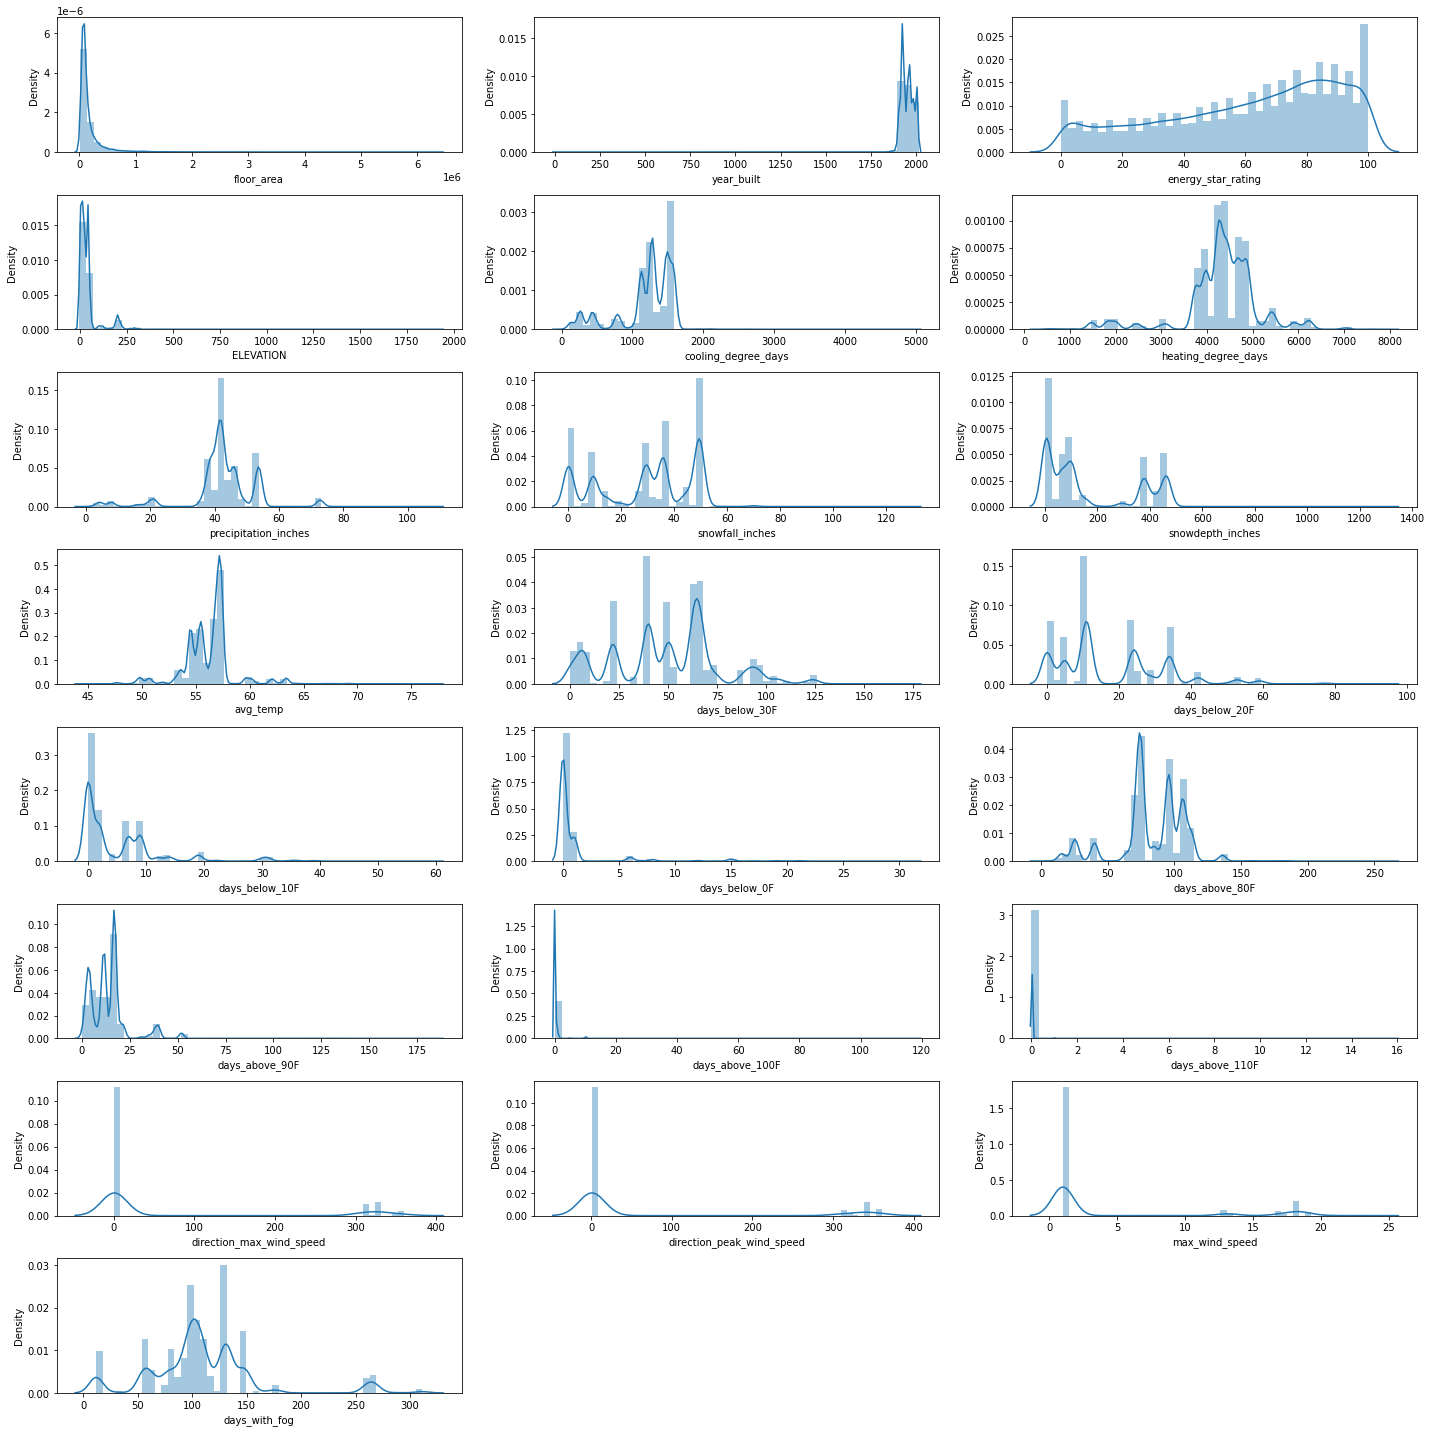

In [10]:
# Looking at the distributions of all numerical variables
plt.figure(figsize=(20,20))

col = ['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'cooling_degree_days','heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F',
       'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

a = 1
for i in range(len(col)):
    plt.subplot(8, 3, a); 
    sns.distplot(train_df[col[i]])
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

/Users/shrutigandhi/Documents/wids-datathon-2022/wids-venv/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


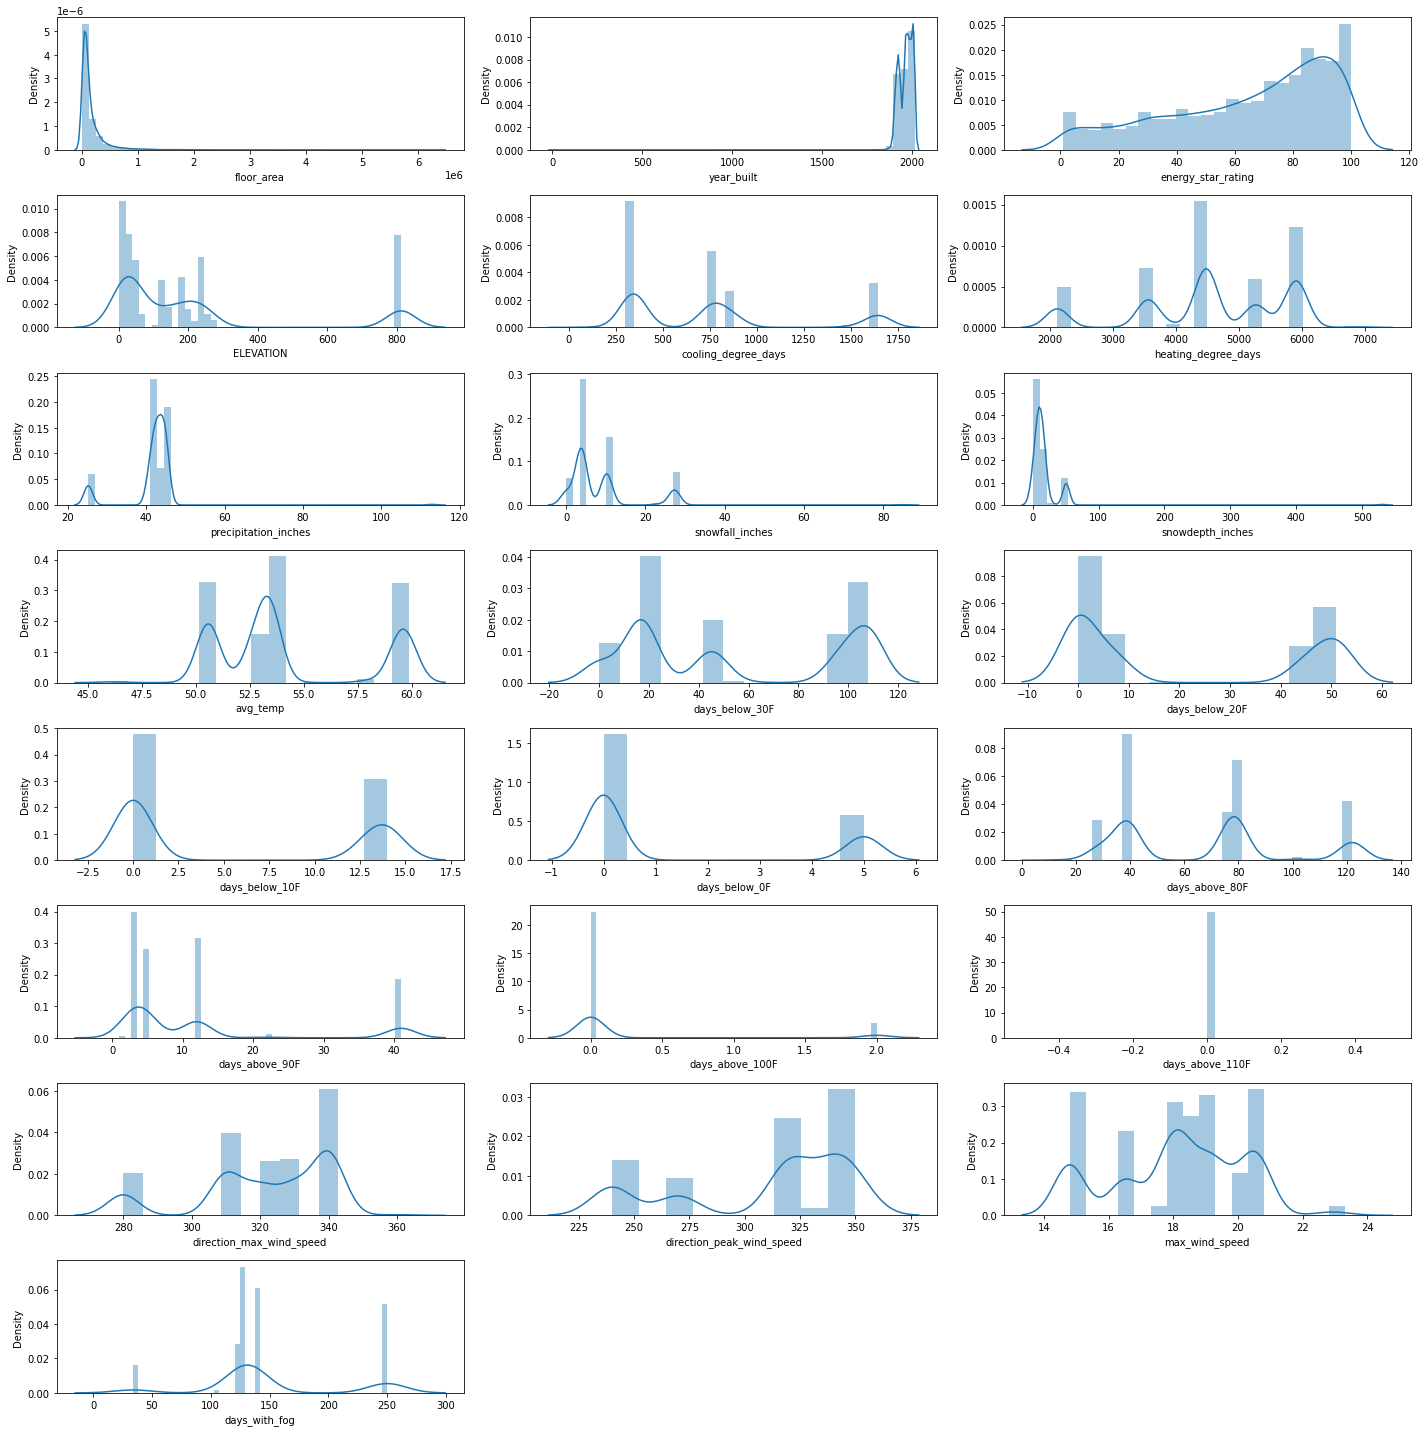

In [11]:
# Looking at the distributions of all numerical variables - test data
plt.figure(figsize=(20,20))

col = ['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'cooling_degree_days','heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F',
       'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

a = 1
for i in range(len(col)):
    plt.subplot(8, 3, a); 
    sns.distplot(test_df[col[i]])
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

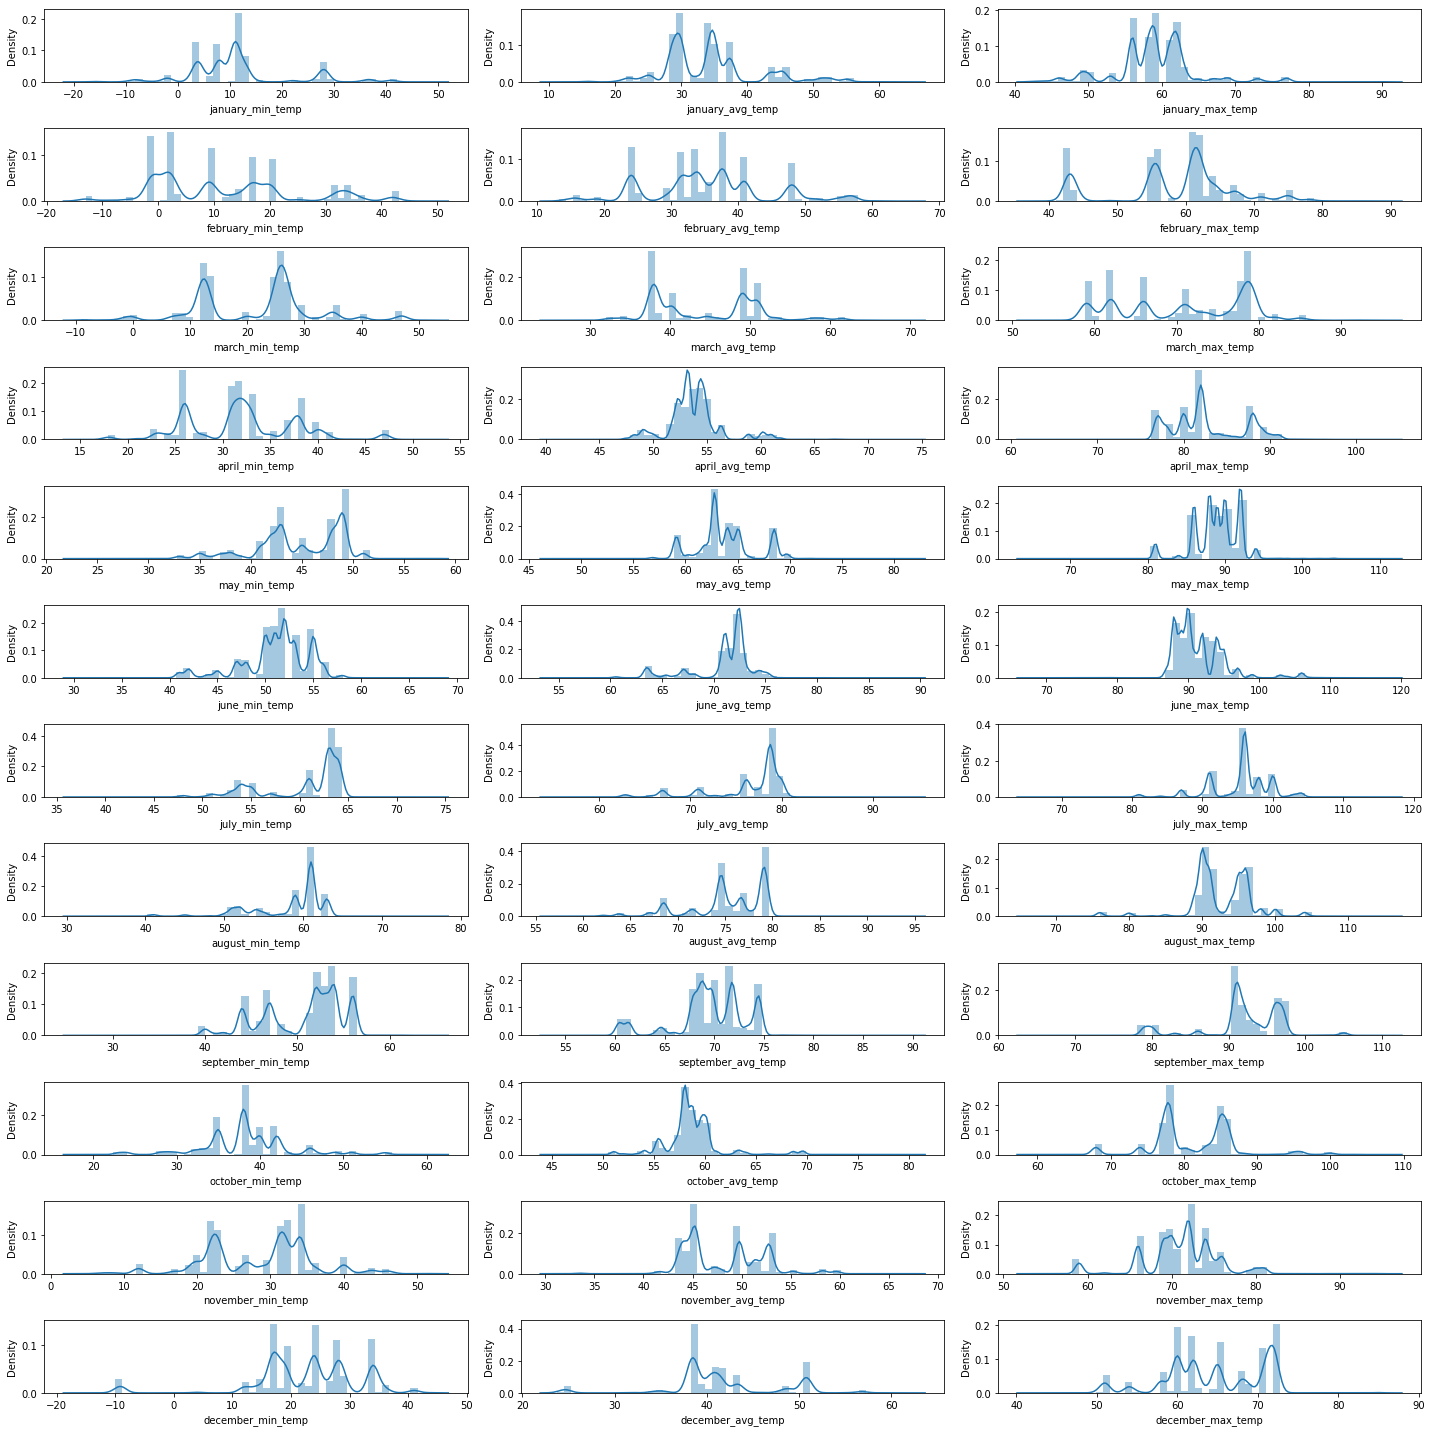

In [12]:
plt.figure(figsize=(20,20))

months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", \
          "november", "december"]
temp_cal = ["min", "avg", "max"]
a = 1
for i in range(len(months)):
    for j in temp_cal:
        plt.subplot(12, 3, a); 
        sns.distplot(train_df[months[i]+"_"+ j +"_temp"])
        plt.xlabel(months[i]+"_"+ j +"_temp")
        a += 1

plt.tight_layout()

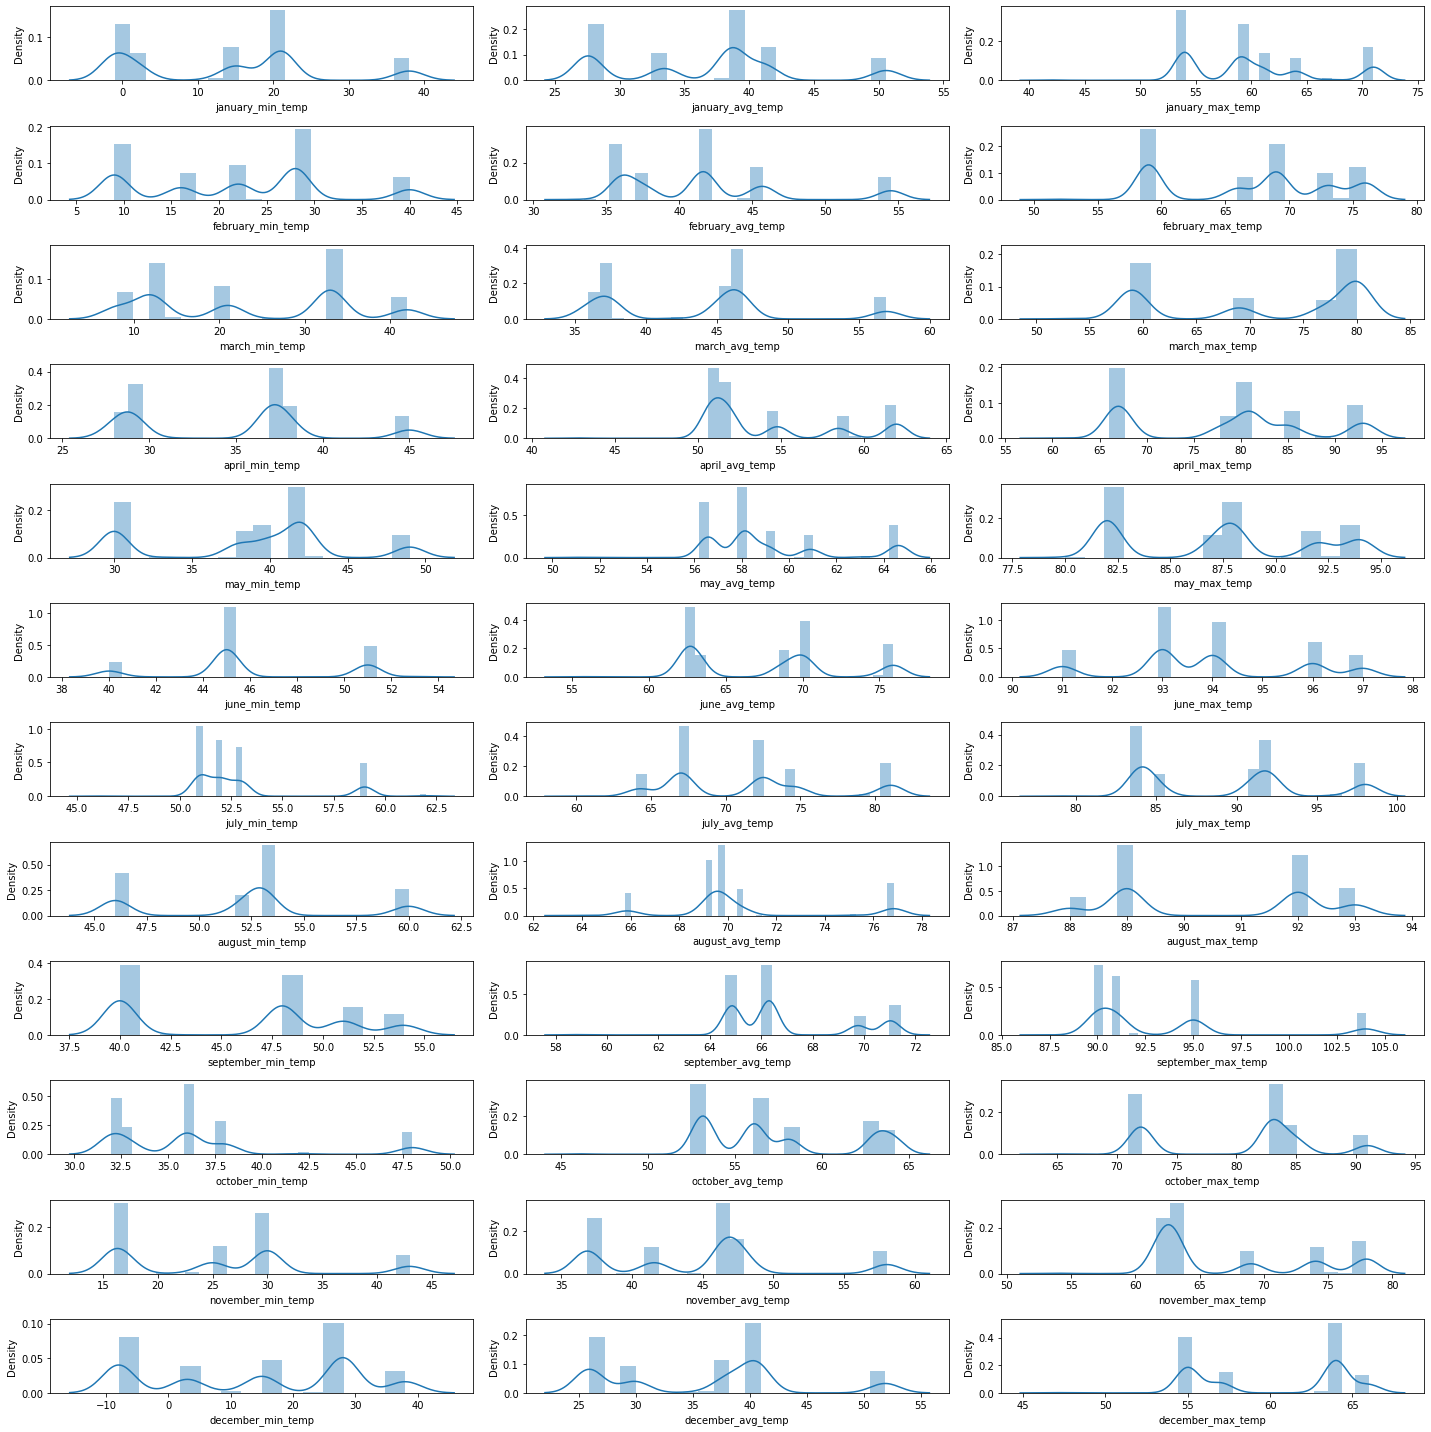

In [13]:
# Test Data
plt.figure(figsize=(20,20))

months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", \
          "november", "december"]
temp_cal = ["min", "avg", "max"]
a = 1
for i in range(len(months)):
    for j in temp_cal:
        plt.subplot(12, 3, a); 
        sns.distplot(test_df[months[i]+"_"+ j +"_temp"])
        plt.xlabel(months[i]+"_"+ j +"_temp")
        a += 1

plt.tight_layout()

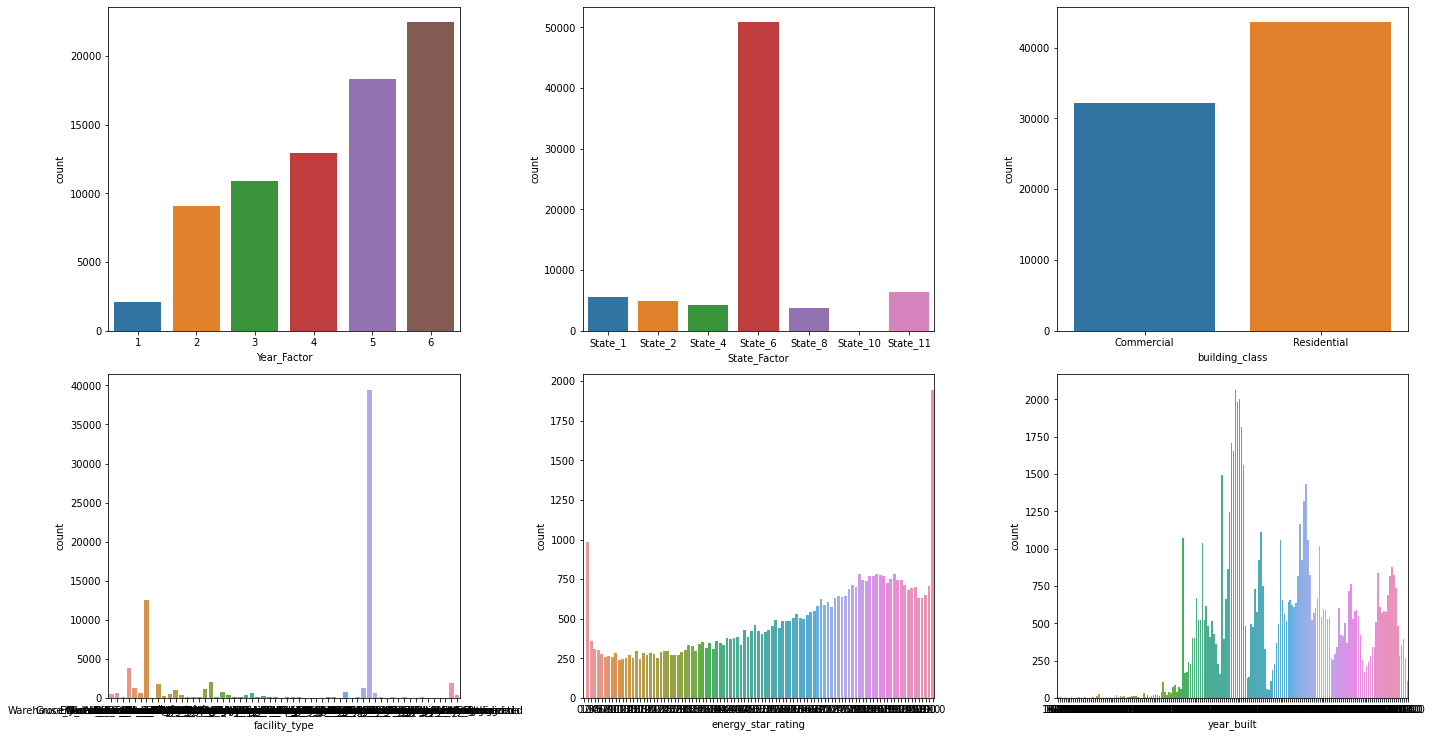

In [14]:
plt.figure(figsize=(20,15))
discrete = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'energy_star_rating', 'year_built']
a = 1
for i in range(len(discrete)):
    plt.subplot(3, 3, a); 
    sns.countplot(train_df[discrete[i]])
    plt.xlabel(discrete[i])
    a += 1
plt.tight_layout()

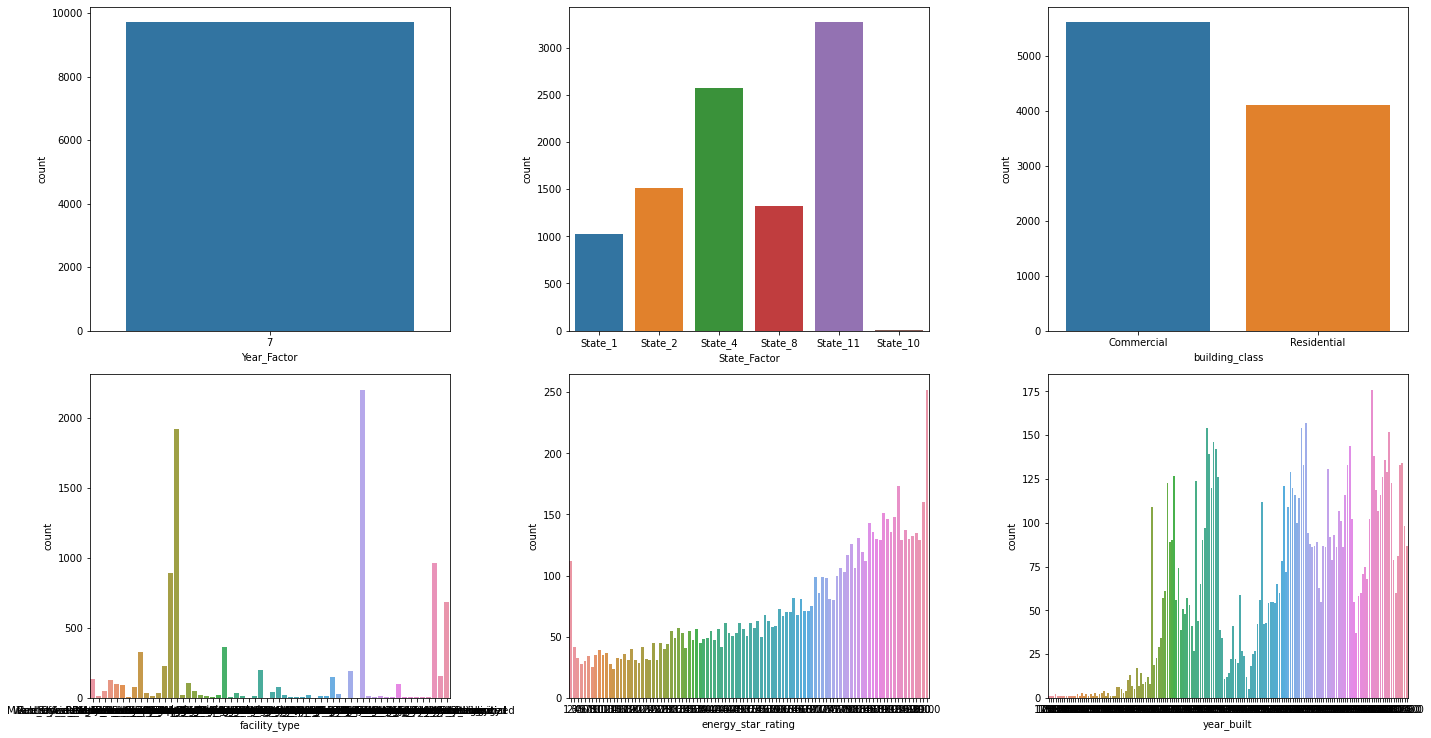

In [15]:
# Test Data
plt.figure(figsize=(20,15))
discrete = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'energy_star_rating', 'year_built']
a = 1
for i in range(len(discrete)):
    plt.subplot(3, 3, a); 
    sns.countplot(test_df[discrete[i]])
    plt.xlabel(discrete[i])
    a += 1
plt.tight_layout()

Text(0.5, 0, 'site_eui')

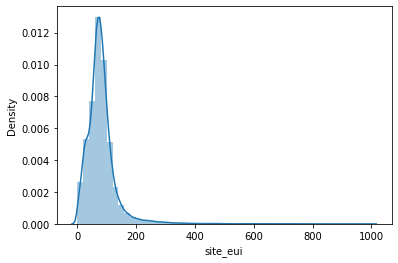

In [16]:
sns.distplot(train_df["site_eui"])
plt.xlabel("site_eui")

In [17]:
train_df_na = pd.DataFrame(train_df.isna().sum())
train_df_na["total"] = train_df.shape[0]
train_df_na["perc_missing"] = round((train_df_na[0]/train_df_na["total"])*100,2)
train_df_na[train_df_na.iloc[:,0]>0]

,0,total,perc_missing
year_built,1837,75757,2.42
energy_star_rating,26709,75757,35.26
direction_max_wind_speed,41082,75757,54.23
direction_peak_wind_speed,41811,75757,55.19
max_wind_speed,41082,75757,54.23
days_with_fog,45796,75757,60.45


In [18]:
test_df_na = pd.DataFrame(test_df.isna().sum())
test_df_na["total"] = test_df.shape[0]
test_df_na["perc_missing"] = round((test_df_na[0]/test_df_na["total"])*100,2)
test_df_na[test_df_na.iloc[:,0]>0]

,0,total,perc_missing
year_built,92,9705,0.95
energy_star_rating,2254,9705,23.23
direction_max_wind_speed,8575,9705,88.36
direction_peak_wind_speed,8575,9705,88.36
max_wind_speed,8575,9705,88.36
days_with_fog,9117,9705,93.94


In [19]:
# Removing the 4 features above, since > 80% missing in test data
# removing days_above_110F since has only 0's as values
var_remove = ["direction_max_wind_speed", "direction_peak_wind_speed", "max_wind_speed", "days_with_fog", "days_above_110F"]
train_df = train_df.drop(columns=var_remove, axis=1)
test_df = test_df.drop(columns=var_remove, axis=1)

Text(0.5, 1.0, 'Train')

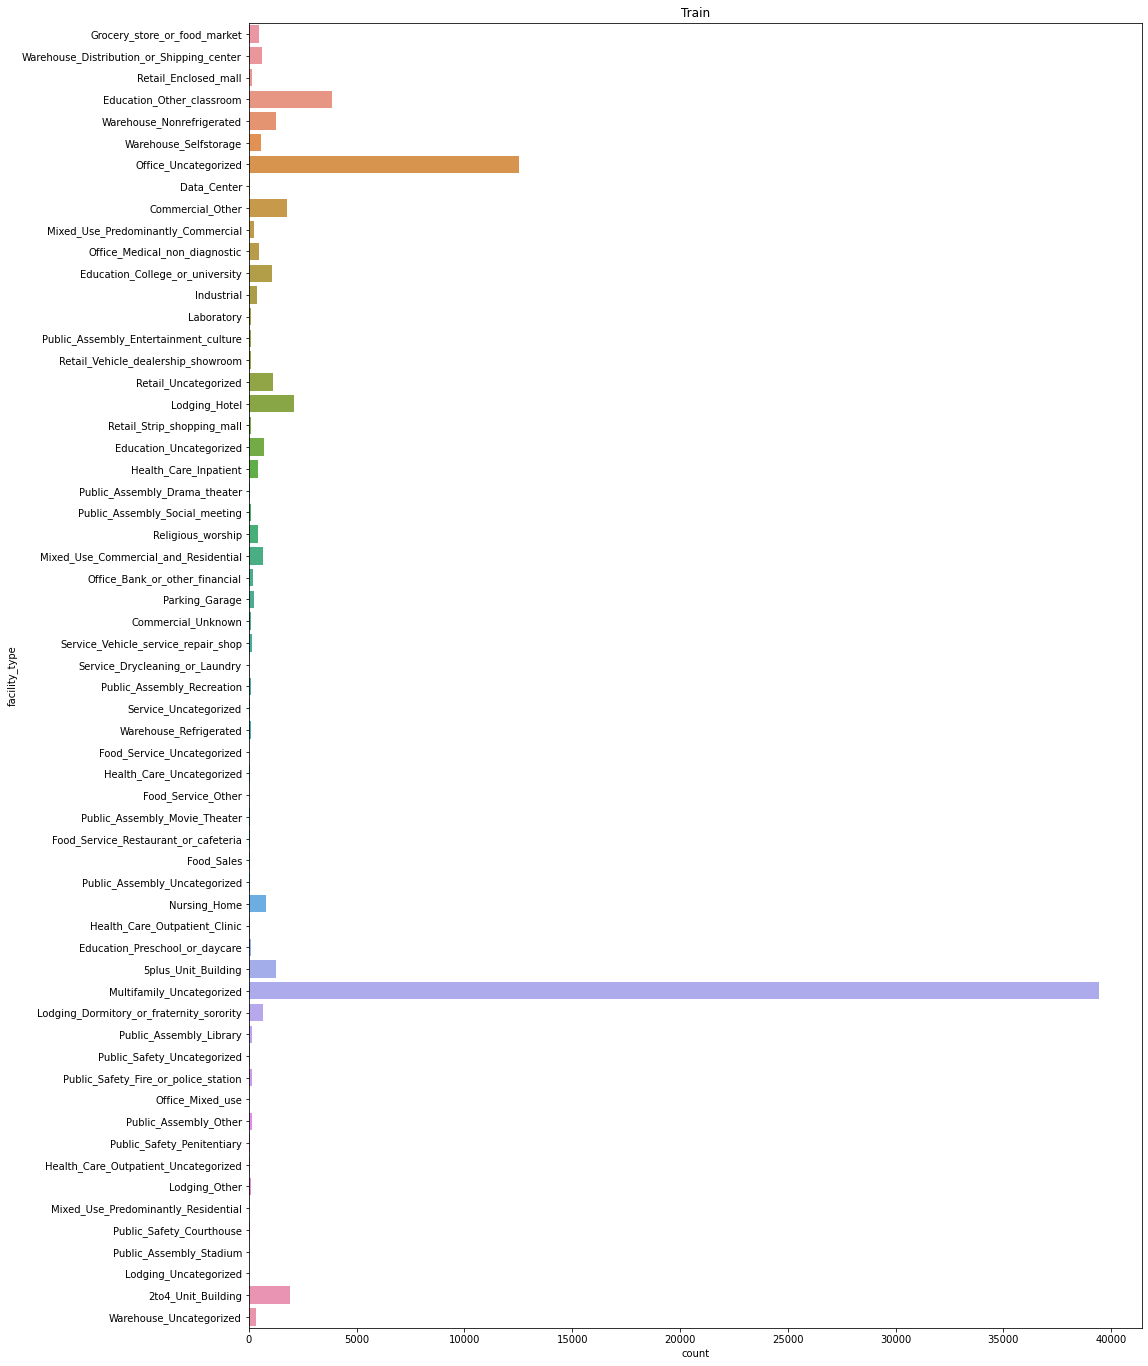

In [20]:
#Outliers, missing values (mean imputation, but add a flag for na), many categories
plt.figure(figsize=(16,24))

sns.countplot(y="facility_type",data=train_df)
plt.title('Train')

Text(0.5, 1.0, 'Test')

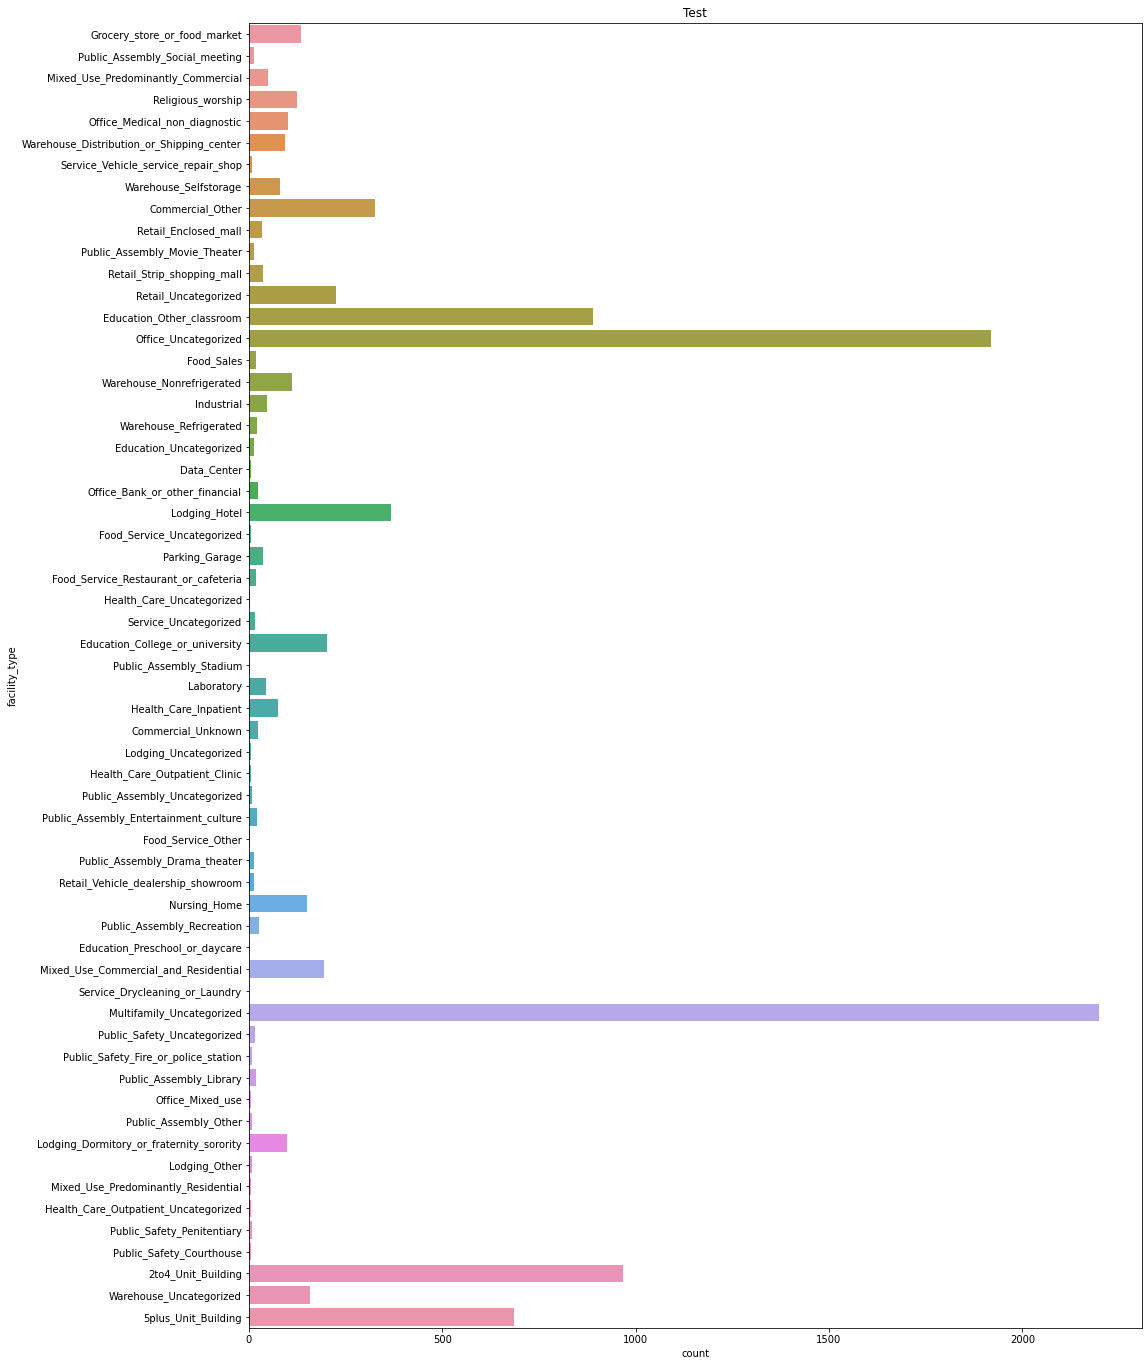

In [21]:
plt.figure(figsize=(16,24))

sns.countplot(y="facility_type",data=test_df)
plt.title('Test')

Text(0.5, 1.0, 'Train')

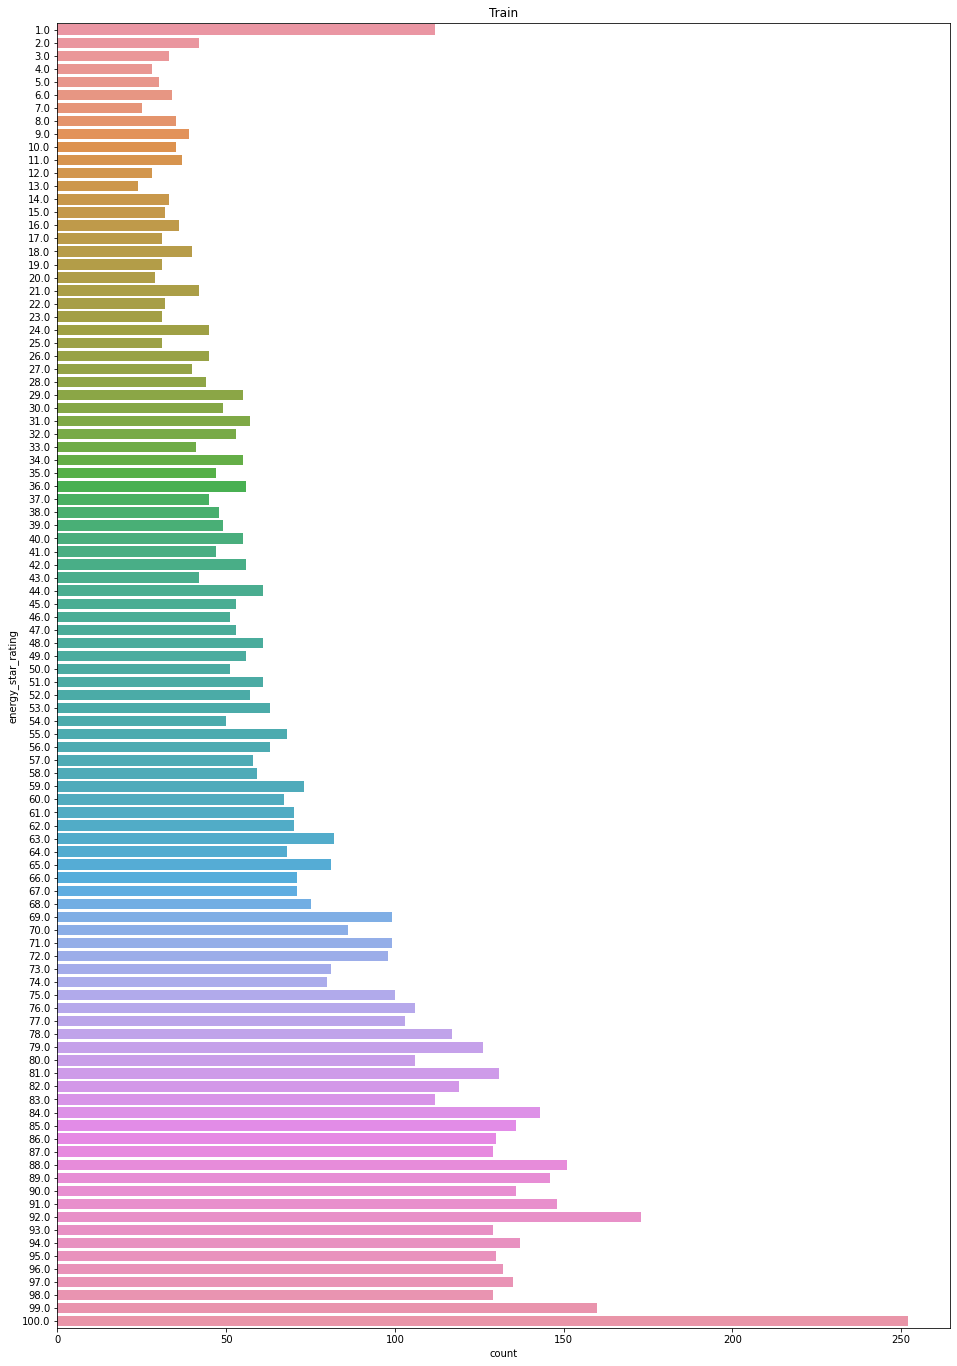

In [22]:
plt.figure(figsize=(16,24))

sns.countplot(y="energy_star_rating",data=test_df)
plt.title('Train')

In [23]:
# Energy star rating has no 0, hence missing can be inferred as 0
train_df["energy_star_rating"] = train_df.energy_star_rating.fillna(0)
test_df["energy_star_rating"] = test_df.energy_star_rating.fillna(0)

In [24]:
# Since year_built is missing for very low number of rows, dropping them
train_df = train_df.dropna()
test_df = test_df.dropna()

In [25]:
train_df.shape, test_df.shape

((73920, 59), (9613, 58))

### Feature Engineering

In [26]:
train_df["facility_type_bin"] = train_df["facility_type"].apply(lambda x: "facility_Other" if x not in \
                                                                ["Multifamily_Uncategorized", 
                                                                 "Office_Uncategorized", "Education_Other_classroom",\
                                                                 "2to4_Unit_Building"] else x)

test_df["facility_type_bin"] = test_df["facility_type"].apply(lambda x: "facility_Other" if x not in \
                                                                ["Multifamily_Uncategorized", 
                                                                 "Office_Uncategorized", "Education_Other_classroom",\
                                                                 "2to4_Unit_Building"] else x)

In [27]:
# building_class x energy_star_rating, standardize most(?) variables
train_df["facility_type_bin"].value_counts()/train_df.shape[0]
train_df.groupby("facility_type_bin").agg({'site_eui': 'mean'})

,site_eui
facility_type_bin,
2to4_Unit_Building,31.878020
Education_Other_classroom,69.472262
Multifamily_Uncategorized,83.830687
Office_Uncategorized,77.040687
facility_Other,93.125263


In [28]:
test_df["facility_type_bin"].value_counts()/test_df.shape[0]
# correlation

facility_Other               0.381983
Multifamily_Uncategorized    0.228337
Office_Uncategorized         0.196921
2to4_Unit_Building           0.100489
Education_Other_classroom    0.092271
Name: facility_type_bin, dtype: float64

In [29]:
a = train_df.groupby("State_Factor").agg({'site_eui': 'mean', 'id': 'count'}).reset_index()
a["perc_count"] = (a["id"]/train_df.shape[0])*100
a

,State_Factor,site_eui,id,perc_count
0,State_1,63.792112,4739,6.410985
1,State_10,68.597082,15,0.020292
2,State_11,53.991973,6410,8.671537
3,State_2,77.308183,4764,6.444805
4,State_4,95.270274,4290,5.803571
5,State_6,87.340445,50007,67.650162
6,State_8,87.449038,3695,4.998647


In [30]:
b = test_df.groupby("State_Factor").agg({'id': 'count'}).reset_index()
b["perc_count"] = (b["id"]/test_df.shape[0])*100
b

# 1, 10 -- train 6.4; test 10.1
# 11 -- train 8.67; test 33.9
# 6, 4, 8 -- train 78.3; test 40.3
# 2 -- train 6.4; test 15.4

,State_Factor,id,perc_count
0,State_1,975,10.142515
1,State_10,4,0.041610
2,State_11,3265,33.964423
3,State_2,1487,15.468636
4,State_4,2563,26.661812
5,State_8,1319,13.721003


In [31]:
train_df["State_Factor_bin"] = train_df["State_Factor"].apply(lambda x: "State_1_10" if x in ["State_1","State_10"]\
                                                              else "State_11" if x in ["State_11"] else "State_6_4_8"
                                                              if x in ["State_6", "State_4", "State_8"] else "State_Others")

test_df["State_Factor_bin"] = test_df["State_Factor"].apply(lambda x: "State_1_10" if x in ["State_1","State_10"]\
                                                              else "State_11" if x in ["State_11"] else "State_6_4_8"
                                                              if x in ["State_6", "State_4", "State_8"] else "State_Others")

In [32]:
train_df["State_Factor_bin"].value_counts()/train_df.shape[0]

State_6_4_8     0.784524
State_11        0.086715
State_Others    0.064448
State_1_10      0.064313
Name: State_Factor_bin, dtype: float64

In [33]:
test_df["State_Factor_bin"].value_counts()/test_df.shape[0]

State_6_4_8     0.403828
State_11        0.339644
State_Others    0.154686
State_1_10      0.101841
Name: State_Factor_bin, dtype: float64

In [34]:
from datetime import date

train_df["time_since_built"] = date.today().year - train_df["year_built"]
test_df["time_since_built"] = date.today().year - test_df["year_built"]

In [35]:
train_df[["year_built", "time_since_built"]]

,year_built,time_since_built
0,1942.0,80.0
1,1955.0,67.0
2,1951.0,71.0
3,1980.0,42.0
4,1985.0,37.0
...,...,...
75752,1995.0,27.0
75753,1910.0,112.0
75754,1917.0,105.0
75755,2012.0,10.0


In [36]:
months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", \
          "november", "december"]
a = 1
for i in range(len(months)):
    train_df[months[i]+"_range_temp"] = train_df[months[i]+"_max_temp"]-train_df[months[i]+"_min_temp"]
    train_df[months[i]+"_range_to_avg_temp"] = train_df[months[i]+"_range_temp"]/train_df[months[i]+"_avg_temp"]
    
    test_df[months[i]+"_range_temp"] = test_df[months[i]+"_max_temp"]-test_df[months[i]+"_min_temp"]
    test_df[months[i]+"_range_to_avg_temp"] = test_df[months[i]+"_range_temp"]/test_df[months[i]+"_avg_temp"]

    
    a += 1

In [37]:
train_df[["february_min_temp","february_max_temp","february_avg_temp","february_range_temp","february_range_to_avg_temp"]]

,february_min_temp,february_max_temp,february_avg_temp,february_range_temp,february_range_to_avg_temp
0,35,73,50.589286,38,0.751147
1,35,73,50.589286,38,0.751147
2,35,73,50.589286,38,0.751147
3,35,73,50.589286,38,0.751147
4,35,73,50.589286,38,0.751147
...,...,...,...,...,...
75752,34,64,47.672414,30,0.629295
75753,34,64,47.672414,30,0.629295
75754,30,58,41.637931,28,0.672464
75755,30,58,41.637931,28,0.672464


In [38]:
test_df[["february_min_temp","february_max_temp","february_avg_temp","february_range_temp","february_range_to_avg_temp"]]

,february_min_temp,february_max_temp,february_avg_temp,february_range_temp,february_range_to_avg_temp
0,40,66,54.482143,26,0.477221
1,40,66,54.482143,26,0.477221
2,40,66,54.482143,26,0.477221
3,40,66,54.482143,26,0.477221
4,40,66,54.482143,26,0.477221
...,...,...,...,...,...
9700,28,59,41.625000,31,0.744745
9701,28,59,41.625000,31,0.744745
9702,28,59,41.625000,31,0.744745
9703,28,59,41.625000,31,0.744745


In [39]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [40]:
num_features = ["floor_area","ELEVATION",'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F','time_since_built', 'january_range_temp',
       'january_range_to_avg_temp', 'february_range_temp',
       'february_range_to_avg_temp', 'march_range_temp',
       'march_range_to_avg_temp', 'april_range_temp',
       'april_range_to_avg_temp', 'may_range_temp', 'may_range_to_avg_temp',
       'june_range_temp', 'june_range_to_avg_temp', 'july_range_temp',
       'july_range_to_avg_temp', 'august_range_temp',
       'august_range_to_avg_temp', 'september_range_temp',
       'september_range_to_avg_temp', 'october_range_temp',
       'october_range_to_avg_temp', 'november_range_temp',
       'november_range_to_avg_temp', 'december_range_temp',
       'december_range_to_avg_temp']

cat_features = ["building_class","energy_star_rating","facility_type_bin"]

<AxesSubplot:>

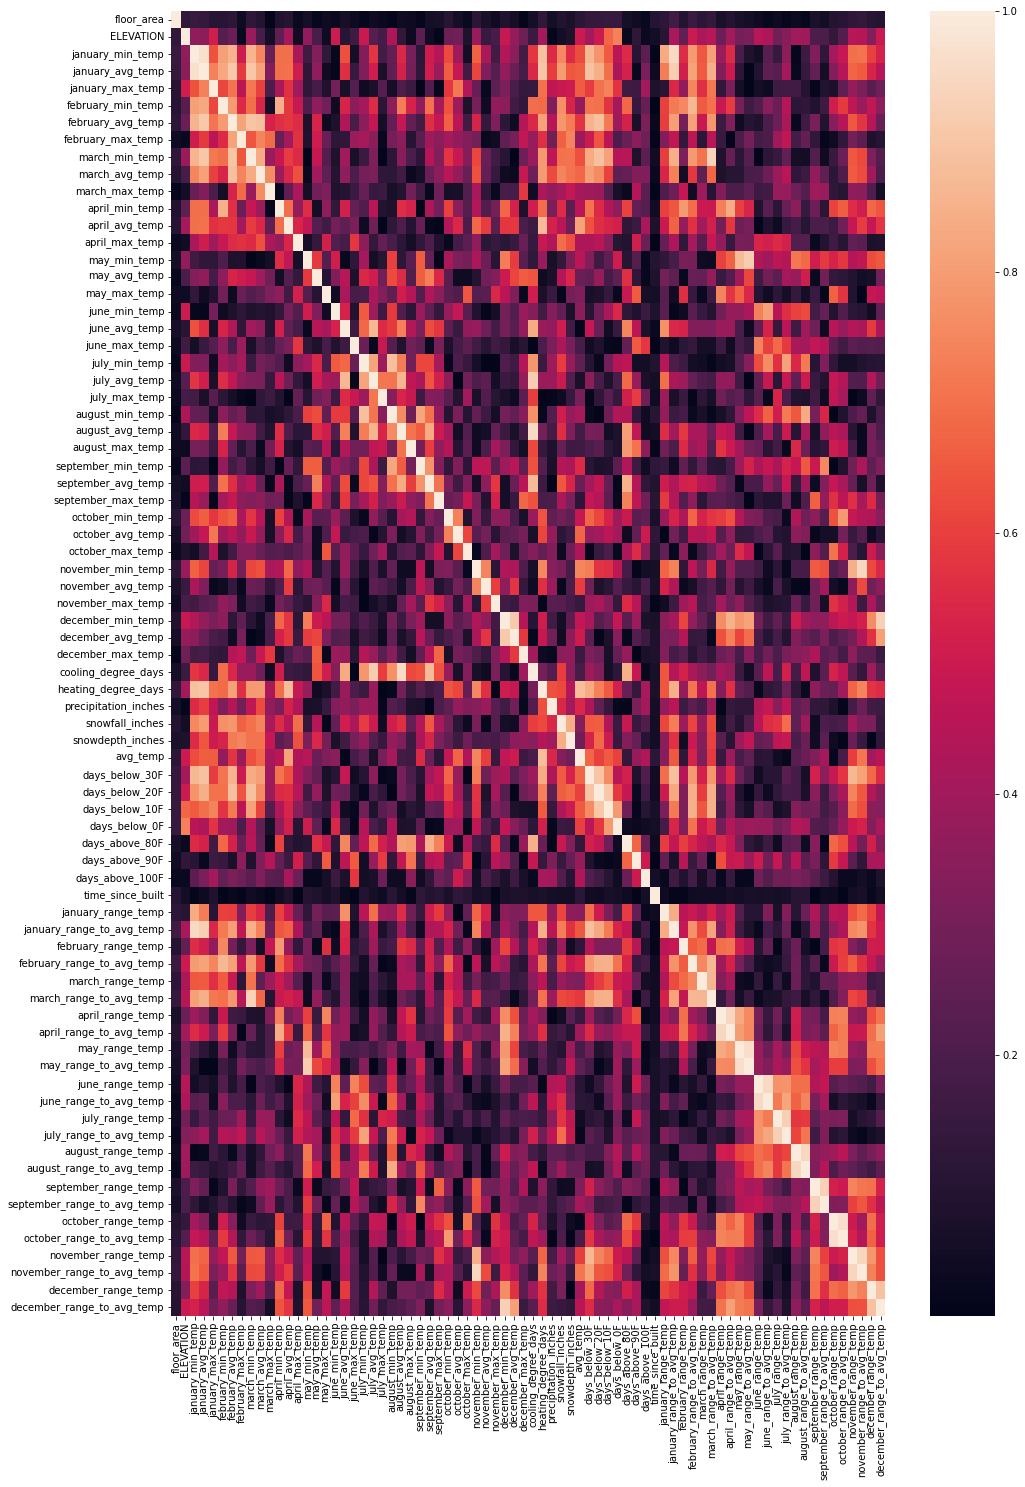

In [41]:
corr = train_df[num_features].corr().abs()

# plot the heatmap
plt.figure(figsize=(16,24))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [42]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

/var/folders/_c/1x8wm3qj4kvg4nwkpkp4hhpm0000gn/T/ipykernel_14243/2845647945.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,...,august_range_temp,august_range_to_avg_temp,september_range_temp,september_range_to_avg_temp,october_range_temp,october_range_to_avg_temp,november_range_temp,november_range_to_avg_temp,december_range_temp,december_range_to_avg_temp
floor_area,NaN,0.130943,0.149552,0.138213,0.101867,0.106569,0.120447,0.037842,0.121491,0.097748,...,0.034736,0.016392,0.071275,0.048890,0.097187,0.108607,0.125639,0.135770,0.103352,0.094242
ELEVATION,NaN,NaN,0.362806,0.350620,0.512328,0.224681,0.270745,0.020271,0.384214,0.184057,...,0.399437,0.393434,0.200303,0.197003,0.135265,0.215428,0.449501,0.443281,0.331392,0.492322
january_min_temp,NaN,NaN,NaN,0.970741,0.638271,0.806389,0.851820,0.507307,0.858038,0.748003,...,0.013394,0.160876,0.323001,0.122673,0.402458,0.482760,0.697301,0.706672,0.603954,0.524438
january_avg_temp,NaN,NaN,NaN,NaN,0.735437,0.825172,0.908543,0.587045,0.906099,0.811185,...,0.022636,0.143982,0.254964,0.056572,0.335000,0.441492,0.672717,0.653396,0.532113,0.449321
january_max_temp,NaN,NaN,NaN,NaN,NaN,0.613488,0.707284,0.459502,0.717479,0.601014,...,0.171220,0.095612,0.015531,0.091040,0.071987,0.247256,0.371579,0.312091,0.234226,0.283227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
october_range_to_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.525856,0.440451,0.670269,0.511696
november_range_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944311,0.787371,0.630719
november_range_to_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737178,0.632984
december_range_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.891688


In [43]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

In [44]:
train_df_new = train_df.drop(columns=train_df[to_drop], axis=1)

In [45]:
train_df_new.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_max_temp', 'march_max_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_max_temp', 'august_max_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_max_temp',
       'precipitation_inches', 'snowfall_inches', 'days_below_0F',
       'days_above_90F', 'days_above_100F', 'site_eui', 'id',
       'facility_type_bin', 'State_Factor_bin', 'time_since_built',
       'february_range_temp', 'march_range_temp', 'april_range_temp',
       'june_range_temp', 'july_range_temp', 'august_range_temp',
       'september_range_temp', 'october_ra

In [46]:
num_features = ["floor_area","ELEVATION",'january_min_temp', 'january_max_temp', 'march_max_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_max_temp', 'august_max_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_max_temp',
       'precipitation_inches', 'snowfall_inches', 'days_below_0F',
       'days_above_90F', 'days_above_100F','time_since_built', 'february_range_temp',
       'march_range_temp', 'april_range_temp', 'june_range_temp',
       'july_range_temp', 'august_range_temp', 'september_range_temp',
       'october_range_temp', 'december_range_temp']

cat_features = ["building_class","energy_star_rating","facility_type_bin"]

In [47]:
train_df_new[num_features] = train_df_new[num_features].apply(lambda x: (x - x.mean())/x.std())
test_df[num_features] = test_df[num_features].apply(lambda x: (x - x.mean())/x.std())

In [48]:
train_df_new = train_df_new.drop(columns=["facility_type", "year_built","State_Factor"], axis=1)

In [49]:
building_class_df = pd.get_dummies(train_df_new["building_class"], dtype="int64")
state_factor_df = pd.get_dummies(train_df_new["State_Factor_bin"], dtype="int64")
facility_df = pd.get_dummies(train_df_new["facility_type_bin"], dtype="int64")
train_df_new = train_df_new.join([building_class_df,state_factor_df,facility_df])
train_df_new.head()

,Year_Factor,building_class,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_max_temp,march_max_temp,april_avg_temp,april_max_temp,...,Residential,State_11,State_1_10,State_6_4_8,State_Others,2to4_Unit_Building,Education_Other_classroom,Multifamily_Uncategorized,Office_Uncategorized,facility_Other
0,1,Commercial,-0.429589,11.0,-0.688238,2.694255,1.789981,1.209654,0.764296,-1.140245,...,0,0,1,0,0,0,0,0,0,1
1,1,Commercial,0.442234,45.0,-0.699731,2.694255,1.789981,1.209654,0.764296,-1.140245,...,0,0,1,0,0,0,0,0,0,1
2,1,Commercial,0.466923,97.0,-0.699731,2.694255,1.789981,1.209654,0.764296,-1.140245,...,0,0,1,0,0,0,0,0,0,1
3,1,Commercial,-0.453835,46.0,-0.699731,2.694255,1.789981,1.209654,0.764296,-1.140245,...,0,0,1,0,0,0,1,0,0,0
4,1,Commercial,-0.410092,100.0,-0.688238,2.694255,1.789981,1.209654,0.764296,-1.140245,...,0,0,1,0,0,0,0,0,0,1


In [50]:
building_class_df_test = pd.get_dummies(test_df["building_class"], dtype="int64")
state_factor_df_test = pd.get_dummies(test_df["State_Factor_bin"], dtype="int64")
facility_df_test = pd.get_dummies(test_df["facility_type_bin"], dtype="int64")
test_df = test_df.join([building_class_df_test,state_factor_df_test,facility_df_test])
test_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,Residential,State_11,State_1_10,State_6_4_8,State_Others,2to4_Unit_Building,Education_Other_classroom,Multifamily_Uncategorized,Office_Uncategorized,facility_Other
0,7,State_1,Commercial,Grocery_store_or_food_market,-0.513432,1994.0,37.0,-0.769483,1.987651,50.596774,...,0,0,1,0,0,0,0,0,0,1
1,7,State_1,Commercial,Grocery_store_or_food_market,-0.538465,1961.0,55.0,-0.606445,1.987651,50.596774,...,0,0,1,0,0,0,0,0,0,1
2,7,State_1,Commercial,Grocery_store_or_food_market,-0.560416,1950.0,1.0,-0.555990,1.987651,50.596774,...,0,0,1,0,0,0,0,0,0,1
3,7,State_1,Commercial,Grocery_store_or_food_market,-0.251081,1971.0,34.0,-0.645228,1.987651,50.596774,...,0,0,1,0,0,0,0,0,0,1
4,7,State_1,Commercial,Grocery_store_or_food_market,-0.388768,1942.0,35.0,-0.771742,1.987651,50.596774,...,0,0,1,0,0,0,0,0,0,1


In [51]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73920 entries, 0 to 75756
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                73920 non-null  int64  
 1   building_class             73920 non-null  object 
 2   floor_area                 73920 non-null  float64
 3   energy_star_rating         73920 non-null  float64
 4   ELEVATION                  73920 non-null  float64
 5   january_min_temp           73920 non-null  float64
 6   january_max_temp           73920 non-null  float64
 7   march_max_temp             73920 non-null  float64
 8   april_avg_temp             73920 non-null  float64
 9   april_max_temp             73920 non-null  float64
 10  may_min_temp               73920 non-null  float64
 11  may_avg_temp               73920 non-null  float64
 12  may_max_temp               73920 non-null  float64
 13  june_min_temp              73920 non-null  flo

### Models

In [52]:
x_train = train_df_new.drop(["Year_Factor","id","site_eui","building_class","facility_type_bin","State_Factor_bin"], axis=1)
y_train = train_df_new["site_eui"]

In [53]:
x_test = test_df[x_train.columns]
# Question - can we standardize target?

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print("MAE: %.2f" %mean_absolute_error(y_train, lr.predict(x_train)))
print("MAPE: %.2f" %mean_absolute_percentage_error(y_train, lr.predict(x_train)))
print("MSE: %.2f" %mean_squared_error(y_train, lr.predict(x_train)))
print("R2: %.2f" %lr.score(x_train, y_train))
Adjusted_R2 = 1 - (1-lr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("Adjusted R2: %.2f" %Adjusted_R2)

MAE: 28.80
MAPE: 0.81
MSE: 2868.40
R2: 0.14
Adjusted R2: 0.14
